In [14]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Add, BatchNormalization, Input, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

In [3]:
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

In [4]:
labels = ['airplane','automobile','bird','cat','deer','dog','frog',
         'horse','ship','truck']

##### Create the identity block

In [27]:
def identity_block(x, filters):
    f1, f2 = filters
    x_shortcut = x

    # First component of main path
    x = Conv2D(filters=f1, kernel_size=(3,3), padding='same')(x)
    x = BatchNormalization()(x)

    # Second component of main path
    x = Conv2D(filters=f2, kernel_size=(3,3), padding='same')(x)
    x = BatchNormalization()(x)

    # Add shortcut to main path
    x = Add()([x, x_shortcut])
    x = Activation('relu')(x)

    return x

##### Create the convolutional block

In [28]:
def convolutional_block(x, filters,s=2):
    f1, f2 = filters
    x_shortcut = x

    # First component of main path
    x = Conv2D(filters=f1, kernel_size=(3,3), strides=(s,s), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # Second component of main path
    x = Conv2D(filters=f2, kernel_size=(3,3), strides=(1,1),padding='same')(x)
    x = BatchNormalization()(x)

    # shortcut path
    x_shortcut = Conv2D(
        filters=f2, kernel_size=(1,1), strides=(s,s),padding='same')(x_shortcut)
    x_shortcut = BatchNormalization()(x_shortcut)

    # Add shortcut to main path
    x = Add()([x, x_shortcut])
    x = Activation('relu')(x)

    return x

##### Design the ResNet architecture

In [29]:
def ResNet(input_shape, num_classes):
    inputs = Input(shape=input_shape)

    # stage-1
    x = Conv2D(64, (5,5), strides=(2,2))(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPool2D((3,3), strides=(2,2))(x)

    # stage-2
    x = convolutional_block(x, filters=[64,64],s=1)
    x = identity_block(x,filters=[64,64])

    # stage-3
    x = convolutional_block(x, filters=[128,128],s=2)
    x = identity_block(x,filters=[128,128])

    # stage-4
    x = convolutional_block(x, filters=[256,256],s=2)
    x = identity_block(x,filters=[256,256])

    # stage-5
    x = convolutional_block(x, filters=[512,512],s=2)
    x = identity_block(x,filters=[512,512])

    x = GlobalAveragePooling2D()(x)

    outputs = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs, outputs)
    return model

In [30]:
model =ResNet((32,32,3), 10)

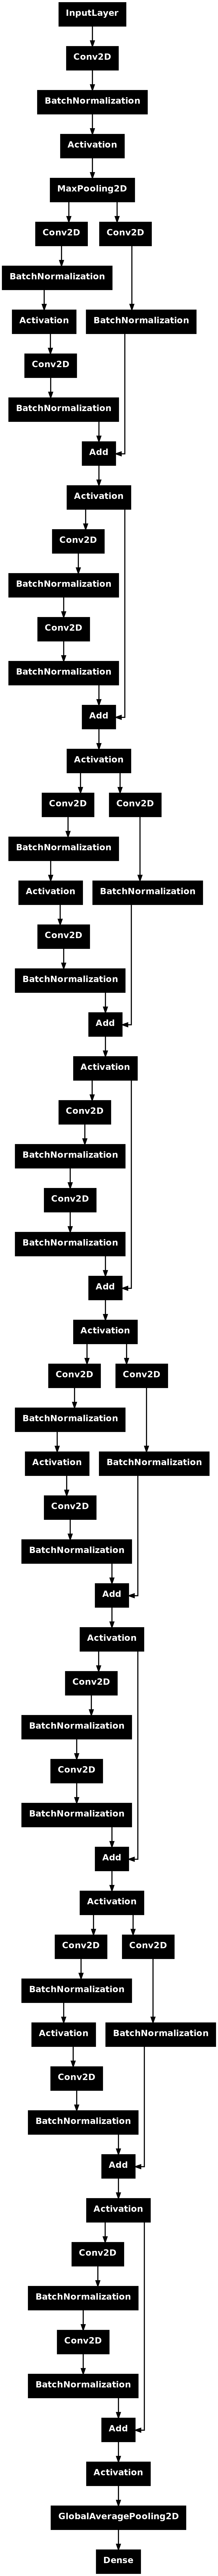

In [32]:
plot_model(model)

In [33]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',
             metrics=['accuracy'])

In [34]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 360s 224ms/step - accuracy: 0.4045 - loss: 1.7395
Epoch 2/5
 504/1563 ━━━━━━━━━━━━━━━━━━━━ 3:58 225ms/step - accuracy: 0.5910 - loss: 1.1595

KeyboardInterrupt: 